In [54]:
import pandas as pd

# 读取CSV文件
data = pd.read_csv("/Users/zhuyanze/Downloads/air_data.csv")

# 丢弃票价为空的数据
data = data[data['SUM_YR_1'].notnull() & data['SUM_YR_2'].notnull()]

# 丢弃票价为0、平均折扣率为0的数据
data = data[~(((data['SUM_YR_1'] == 0) & (data['SUM_YR_2'] == 0))| (data['avg_discount'] == 0))]

# 重置索引
data.reset_index(drop=True, inplace=True)

# 保存清洗后的数据到新的CSV文件
data.to_csv("cleaned_data.csv", index=False)

In [55]:
import pandas as pd

# 读取原始数据文件
data = pd.read_csv("cleaned_data.csv")

# 选择与LRFMC模型相关的属性
selected_columns = ['FFP_DATE', 'LOAD_TIME', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'LAST_TO_END', 'avg_discount']
filtered_data = data[selected_columns]

# 用筛选后的数据更新CSV文件
filtered_data.to_csv("cleaned_data.csv", index=False)

In [56]:
import pandas as pd
from datetime import datetime

# 读取 CSV 文件
data = pd.read_csv("cleaned_data.csv")

# 将日期字符串转换为日期对象
data['LOAD_TIME'] = pd.to_datetime(data['LOAD_TIME'])
data['FFP_DATE'] = pd.to_datetime(data['FFP_DATE'])

# 计算 L（单位：月）
data['L'] = (data['LOAD_TIME'] - data['FFP_DATE']).dt.days // 30

# R 已经在原始数据中，直接除以30转换为月
data['R'] = data['LAST_TO_END'] // 30

# F 和 M 已经在原始数据中，无需计算
data['F'] = data['FLIGHT_COUNT']
data['M'] = data['SEG_KM_SUM']

# C 已经在原始数据中，无需计算
data['C'] = data['avg_discount']

# 保留 LRFMC 五个指标列
lrfmc_data = data[['L', 'R', 'F', 'M', 'C']]

# 将构造好的 LRFMC 数据保存到新的 CSV 文件
lrfmc_data.to_csv("lrfmc_data.csv", index=False)

In [57]:
import pandas as pd
from scipy.stats import zscore

# 读取 LRFMC 数据
data = pd.read_csv("lrfmc_data.csv")

# 对每个指标进行 Z-score 标准化
data['L_norm'] = zscore(data['L'])
data['R_norm'] = zscore(data['R'])
data['F_norm'] = zscore(data['F'])
data['M_norm'] = zscore(data['M'])
data['C_norm'] = zscore(data['C'])

# 保留标准化后的列
normalized_data = data[['L_norm', 'R_norm', 'F_norm', 'M_norm', 'C_norm']]

# 用标准化后的数据更新 CSV 文件
normalized_data.to_csv("lrfmc_normalized_data.csv", index=False)

In [58]:
import pandas as pd
from sklearn.cluster import KMeans

# 加载数据
data = pd.read_csv('lrfmc_normalized_data.csv')

# 进行k-means聚类
k = 5  # 指定要聚类的数量
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data)

# 保存聚类结果
data.to_csv('lrfmc_clustered_data.csv', index=False)

# 获取聚类结果
cluster_centers = kmeans.cluster_centers_
cluster_counts = data['Cluster'].value_counts().sort_index()

# 将聚类结果存储在一个新的DataFrame中
cluster_summary = pd.DataFrame(cluster_centers, columns=['L_norm', 'R_norm', 'F_norm', 'M_norm', 'C_norm'])
cluster_summary['客户群'] = ['客户群1', '客户群2', '客户群3', '客户群4', '客户群5']
cluster_summary['客户数'] = cluster_counts.values
cluster_summary.set_index('客户群', inplace=True)

# 将客户数放在第一列
cluster_summary = cluster_summary[['客户数', 'L_norm', 'R_norm', 'F_norm', 'M_norm', 'C_norm']]

# 以表格形式显示聚类结果
print("聚类结果:")
print(cluster_summary)

/Users/zhuyanze/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


聚类结果:
        客户数    L_norm    R_norm    F_norm    M_norm    C_norm
客户群                                                          
客户群1   5320  0.481151 -0.785623  2.481015  2.421534  0.280364
客户群2  25346 -0.698089 -0.410632 -0.168534 -0.169956 -0.212573
客户群3  12413 -0.314787  1.674557 -0.572375 -0.536624 -0.133931
客户群4   2854  0.169374 -0.076747 -0.108660 -0.088097  2.684727
客户群5  16111  1.150646 -0.370644 -0.095383 -0.104640 -0.129079


findfont: Generic family 'sans-serif' not found because none of the following families were found: STSong
findfont: Generic family 'sans-serif' not found because none of the following families were found: STSong
findfont: Generic family 'sans-serif' not found because none of the following families were found: STSong
findfont: Generic family 'sans-serif' not found because none of the following families were found: STSong
findfont: Generic family 'sans-serif' not found because none of the following families were found: STSong
findfont: Generic family 'sans-serif' not found because none of the following families were found: STSong
findfont: Generic family 'sans-serif' not found because none of the following families were found: STSong
findfont: Generic family 'sans-serif' not found because none of the following families were found: STSong
findfont: Generic family 'sans-serif' not found because none of the following families were found: STSong
findfont: Generic family 'sans-serif' not foun

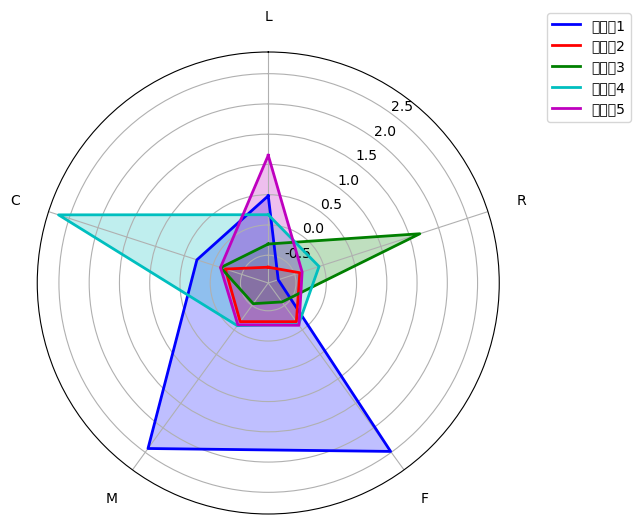

In [64]:
import numpy as np
import matplotlib.pyplot as plt
# 绘制雷达图
labels = ['L_norm', 'R_norm', 'F_norm', 'M_norm', 'C_norm']
attributes = ['L', 'R', 'F', 'M', 'C']
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # 闭合雷达图

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
colors = ['b', 'r', 'g', 'c', 'm']

for i, color in enumerate(colors):
    values = cluster_centers[i].tolist()
    values += values[:1]  # 闭合雷达图
    ax.plot(angles, values, color=color, linewidth=2, label=f'客户群{i + 1}')
    ax.fill(angles, values, color=color, alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), attributes)  # 使用attributes替代labels
ax.set_rlabel_position(180 / num_vars)
ax.tick_params(axis='both', which='major', pad=15)

# 添加图例
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), prop={'size': 10})

# 显示雷达图
plt.show()

In [65]:
# 对五个客户群进行属性横向比较，找到最大值、次大值、居中值、次小值和最小值所在的客户群
comparison_table = pd.DataFrame(columns=labels, index=[f'客户群{i + 1}' for i in range(k)])

for i, label in enumerate(labels):
    sorted_indices = np.argsort(cluster_centers[:, i])[::-1]  # 降序排序

    for j, idx in enumerate(sorted_indices):
        if j == 0:
            rank = '最大'
        elif j == 1:
            rank = '次大'
        elif j == 2:
            rank = '居中'
        elif j == 3:
            rank = '次小'
        else:
            rank = '最小'

        comparison_table.at[f'客户群{idx + 1}', label] = rank

print("\n属性横向比较等级：")
print(comparison_table)


属性横向比较等级：
     L_norm R_norm F_norm M_norm C_norm
客户群1     次大     最小     最大     最大     次大
客户群2     最小     次小     次小     次小     最小
客户群3     次小     最大     最小     最小     次小
客户群4     居中     次大     居中     次大     最大
客户群5     最大     居中     次大     居中     居中


In [66]:
# 对五个客户群进行属性横向比较，计算每个客户群的分数
value_table = pd.DataFrame(columns=['分数'], index=[f'客户群{i + 1}' for i in range(k)])

for i in range(k):
    score = cluster_centers[i, 0] - cluster_centers[i, 1] + cluster_centers[i, 2] + cluster_centers[i, 3] + cluster_centers[i, 4]
    value_table.at[f'客户群{i + 1}', '分数'] = score

# 价值排名计算
sorted_value_table = value_table.sort_values('分数', ascending=False)
sorted_value_table['排名'] = range(1, k + 1)

print("\n客户价值排名:")
print(sorted_value_table)

print("\n排名规则：每个客户群的分数为（L_norm - R_norm + F_norm + M_norm + C_norm），分数越高排名越高。")


客户价值排名:
            分数  排名
客户群1  6.449685   1
客户群4  2.734092   2
客户群5  1.192189   3
客户群2  -0.83852   4
客户群3 -3.232274   5

排名规则：每个客户群的分数为（L_norm - R_norm + F_norm + M_norm + C_norm），分数越高排名越高。
